In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go 

In [21]:
# Load the data into a DataFrame
df = pd.read_csv('fy25-adopted-operating-budget.csv')

columns_to_convert = ['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget'] 
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce') 
result = df.groupby("Expense Category")[columns_to_convert].sum()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
result = result.T


In [22]:
# Create the Plotly figure  
fig = go.Figure()  

# Add a bar trace for each expense category  
for category in result.columns:  
    fig.add_trace(go.Bar(x=result.index, y=result[category], name=category))  

# Update the layout  
fig.update_layout(  
    title='Total Budget by Expense Category',  
    xaxis_title='Fiscal Year',  
    yaxis_title='Total Budget',  
    barmode='group',  # Group bars by expense category  
    xaxis_tickangle=-45,  
    margin=dict(l=20, r=20, t=80, b=150),  
    legend_title='Expense Category'  
)  

# Show the figure  
fig.show()  

In [23]:
# read the data
df2020 = pd.read_csv('2020_earnings.csv', encoding='latin1')  
df2021 = pd.read_csv('employee-earnings-report-2021.csv', encoding='latin1')
df2022 = pd.read_csv('employee-earnings-report-2022.csv', encoding='latin1')
df2023 = pd.read_csv('employee-earnings-report-2023.csv',encoding='latin1')
df2024 = pd.read_csv('employee_earnings_report_2024.csv',encoding='latin1')
#2020年top10收入部门
df2020[' TOTAL EARNINGS '] = df2020[' TOTAL EARNINGS '].replace('[\$,]', '', regex=True).astype(float) 
year2020 = df2020.groupby('DEPARTMENT_NAME')[' TOTAL EARNINGS '].sum().sort_values(ascending=False)
year2020 = year2020.head(10)
#2021年top10收入部门
df2021['TOTAL_GROSS'] = df2021['TOTAL_GROSS'].replace('[\$,]', '', regex=True).astype(float) 
year2021 = df2021.groupby('DEPARTMENT_NAME')['TOTAL_GROSS'].sum().sort_values(ascending=False)
year2021= year2021.head(10)
#2022年top10收入部门
df2022['TOTAL_ GROSS'] = df2022['TOTAL_ GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2022 = df2022.groupby('DEPARTMENT_NAME')['TOTAL_ GROSS'].sum().sort_values(ascending=False)
year2022= year2022.head(10)
#2023年top10收入部门
df2023['TOTAL GROSS'] = df2023['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2023 = df2023.groupby('DEPARTMENT_NAME')['TOTAL GROSS'].sum().sort_values(ascending=False)
year2023= year2023.head(10)
#2024年top10收入部门
df2024['TOTAL GROSS'] = df2024['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)
year2024 = df2024.groupby('DEPARTMENT_NAME')['TOTAL GROSS'].sum().sort_values(ascending=False)
year2024= year2024.head(10)

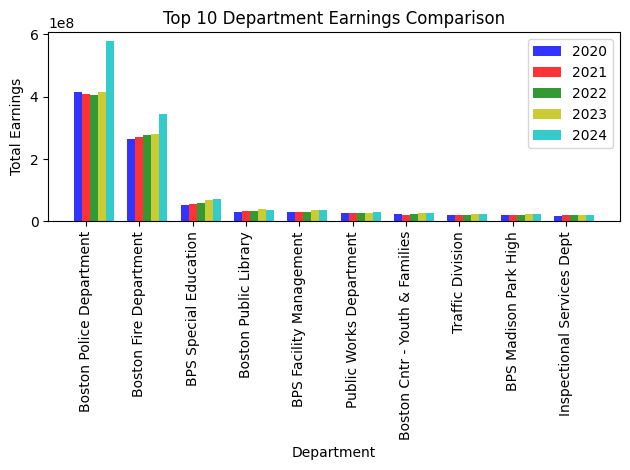

In [24]:
#把year2020,year2021,year2022,year2023,year2024画图，比较top10部门的收入
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, year2020, bar_width, alpha=opacity, color='b', label='2020')
rects2 = plt.bar(index + bar_width, year2021, bar_width, alpha=opacity, color='r', label='2021')
rects3 = plt.bar(index + bar_width*2, year2022, bar_width, alpha=opacity, color='g', label='2022')
rects4 = plt.bar(index + bar_width*3, year2023, bar_width, alpha=opacity, color='y', label='2023')
rects5 = plt.bar(index + bar_width*4, year2024, bar_width, alpha=opacity, color='c', label='2024')

plt.xlabel('Department')
plt.ylabel('Total Earnings')
plt.title('Top 10 Department Earnings Comparison')
plt.xticks(index + bar_width, year2020.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd  
import plotly.graph_objects as go  

# Read the data  
df2020 = pd.read_csv('2020_earnings.csv', encoding='latin1')  


df2020[' TOTAL EARNINGS '] = df2020[' TOTAL EARNINGS '].replace('[\$,]', '', regex=True).astype(float)  
year2020 = df2020.groupby('DEPARTMENT_NAME')[' TOTAL EARNINGS '].sum().sort_values(ascending=False)  
year2020 = year2020.head(10)  

# Filter for the top 10 departments  
df2020 = df2020[df2020['DEPARTMENT_NAME'].isin(year2020.index)]  

cols_needed = ['DEPARTMENT_NAME', ' REGULAR ', ' OVERTIME ', ' OTHER ', ' INJURED ',' QUINN / EDUCATION INCENTIVE ']  
df2020_polted = df2020[cols_needed].copy()  

for col in df2020_polted.columns[1:]:  
    df2020_polted[col] = (  
        df2020_polted[col]  
        .replace('[\$,]', '', regex=True)  
        .replace(r'\((.*?)\)', r'-\1', regex=True)  
        .astype(float)  
    )  

df2020_sum = df2020_polted.groupby('DEPARTMENT_NAME').sum()  
df2020_sum = df2020_sum.reset_index()  
df2020_sum = df2020_sum.sort_index(ascending=False)  
df2020_sum = df2020_sum.set_index('DEPARTMENT_NAME')  
df2020_sum = df2020_sum.T  
df2020_sum = df2020_sum.rename(index={' REGULAR ': 'Regular', ' OVERTIME ': 'Overtime', ' OTHER ': 'Other', ' INJURED ': 'Injured', ' QUINN / EDUCATION INCENTIVE ': 'Quinn/Education Incentive'})  


# Create Plotly figure  
fig = go.Figure()  

# Add bar traces for each expense category  
for category in df2020_sum.index:  
    fig.add_trace(go.Bar(x=df2020_sum.columns, y=df2020_sum.loc[category], name=category))  

# Update layout  
fig.update_layout(  
    title='Total Earnings by Expense Category for Top 10 Departments in 2020',  
    xaxis_title='Department',  
    yaxis_title='Total Earnings',  
    barmode='group',  
    xaxis_tickangle=-45,  
    margin=dict(l=20, r=20, t=80, b=150),  
    legend_title='Expense Category'  
)  

# Show the figure  
fig.show()

In [26]:
import pandas as pd  
import plotly.graph_objects as go  
import re  

# Read the data  
df2024 = pd.read_csv('employee_earnings_report_2024.csv', encoding='latin1')  

# 2024年top10收入部门  
df2024['TOTAL GROSS'] = df2024['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)  
year2024 = df2024.groupby('DEPARTMENT_NAME')['TOTAL GROSS'].sum().sort_values(ascending=False)  
year2024 = year2024.head(10)  

# Filter for the top 10 departments  
df2024 = df2024[df2024['DEPARTMENT_NAME'].isin(year2024.index)]  

# Define the columns needed.  Adjust to match the actual column names in df2024.  
cols_needed_2024 = ['DEPARTMENT_NAME', 'REGULAR', 'OVERTIME', 'OTHER', 'INJURED','QUINN_EDUCATION']  

#Check if the  columns exist, if not print available columns  
for col in cols_needed_2024:  
    if col not in df2024.columns:  
        print(f"Column {col} not found in df2024")  
        print("Available columns are:", df2024.columns.tolist())  
        raise ValueError(f"Required column '{col}' is missing.")  


df2024_polted = df2024[cols_needed_2024].copy()  

# Clean and convert numeric columns  
for col in df2024_polted.columns[1:]:  
    # First ensure the column is of type string  
    df2024_polted[col] = df2024_polted[col].astype(str)  
    df2024_polted[col] = (  
        df2024_polted[col]  
        .str.replace('[\$,]', '', regex=True)  
        .str.replace(r'\((.*?)\)', r'-\1', regex=True)  
        .astype(float)  
    )  

df2024_sum = df2024_polted.groupby('DEPARTMENT_NAME').sum()  
df2024_sum = df2024_sum.reset_index()  
df2024_sum = df2024_sum.sort_index(ascending=False)  
df2024_sum = df2024_sum.set_index('DEPARTMENT_NAME')  
df2024_sum = df2024_sum.T  

#Dynamically rename the index, checking for the presence of the columns first.  
rename_dict = {}  

if 'REGULAR' in df2024_sum.index:  
    rename_dict['REGULAR'] = 'Regular'  
if 'OVERTIME' in df2024_sum.index:  
    rename_dict['OVERTIME'] = 'Overtime'  
if 'OTHER' in df2024_sum.index:  
    rename_dict['OTHER'] = 'Other'  
if 'INJURED' in df2024_sum.index:  
    rename_dict['INJURED'] = 'Injured'  
if 'QUINN_EDUCATION' in df2024_sum.index:  
    rename_dict['QUINN_EDUCATION'] = 'Quinn/Education Incentive'  

df2024_sum = df2024_sum.rename(index=rename_dict)  

# Create Plotly figure  
fig = go.Figure()  

# Add bar traces for each expense category  
for category in df2024_sum.index:  
    fig.add_trace(go.Bar(x=df2024_sum.columns, y=df2024_sum.loc[category], name=category))  

# Update layout  
fig.update_layout(  
    title='Total Earnings by Expense Category for Top 10 Departments in 2024',  
    xaxis_title='Department',  
    yaxis_title='Total Earnings',  
    barmode='group',  
    xaxis_tickangle=-45,  
    margin=dict(l=20, r=20, t=80, b=150),  
    legend_title='Expense Category'  
)  

# Show the figure  
fig.show()

In [27]:
import plotly.graph_objects as go


fig = go.Figure()


fig.add_trace(go.Bar(
    x=df2020_sum.index,  
    y=df2020_sum.iloc[:, 0],  
    marker_color='blue' 
))

fig.add_trace(go.Bar(
    x=df2024_sum.index,  
    y=df2024_sum.iloc[:, 0],  
    name='2024',  
    marker_color='red'  
))


fig.update_layout(
    title='Total Earnings by Expense Category for Departments in 2020 and 2024',
    xaxis_title='Expense Category',
    yaxis_title='Total Earnings',
    barmode='group',  
    xaxis_tickangle=-45,
    legend_title='Year',
    height=600,  
    width=800  
)


fig.show()

2020 Injured - Max: 25272021.09, Mean: 4231181.3149999995, Variance: 80574886206358.27
2024 Injured - Max: 20552550.44, Mean: 4105282.082, Variance: 68899807503967.93


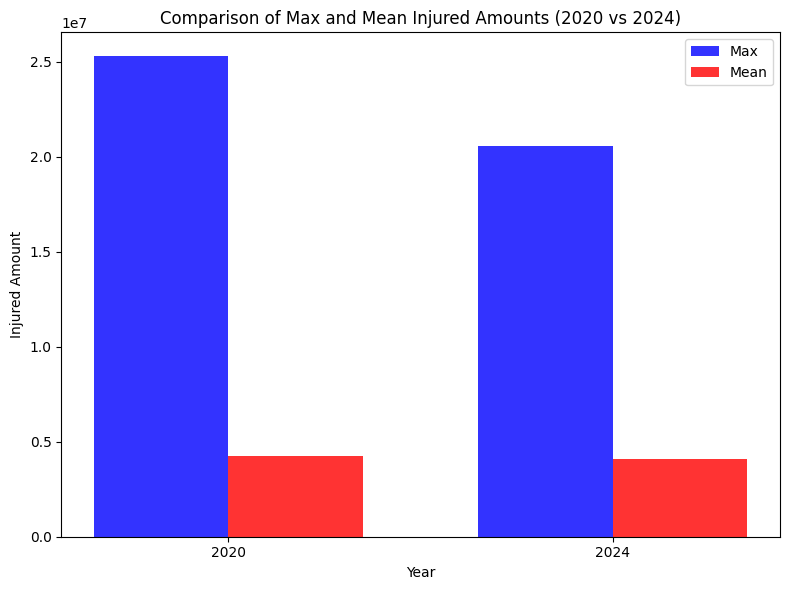

In [28]:
#我想要分析得到2020到2024年的injured的最大值和平均值以及方差，并且画图
df2020_injured = df2020_polted.groupby('DEPARTMENT_NAME')[' INJURED '].sum()
df2020_injured = df2020_injured.reset_index()
df2020_injured = df2020_injured.sort_index(ascending=False)
df2020_injured = df2020_injured.set_index('DEPARTMENT_NAME')
df2020_injured = df2020_injured.rename(index={' INJURED ': 'Injured'})
df2020_injured = df2020_injured.T


df2024_injured = df2024_polted.groupby('DEPARTMENT_NAME')['INJURED'].sum()
df2024_injured = df2024_injured.reset_index()
df2024_injured = df2024_injured.sort_index(ascending=False)
df2024_injured = df2024_injured.set_index('DEPARTMENT_NAME')
df2024_injured = df2024_injured.rename(index={'INJURED': 'Injured'})
df2024_injured = df2024_injured.T



max_2020 = df2020_injured.max(axis=1).values[0]
mean_2020 = df2020_injured.mean(axis=1).values[0]
var_2020 = df2020_injured.var(axis=1).values[0]
print(f"2020 Injured - Max: {max_2020}, Mean: {mean_2020}, Variance: {var_2020}")
max_2024 = df2024_injured.max(axis=1).values[0]
mean_2024 = df2024_injured.mean(axis=1).values[0]
var_2024 = df2024_injured.var(axis=1).values[0]
print(f"2024 Injured - Max: {max_2024}, Mean: {mean_2024}, Variance: {var_2024}")

labels = ['2020', '2024']
max_values = [max_2020, max_2024]
mean_values = [mean_2020, mean_2024]

x = np.arange(len(labels))  
bar_width = 0.35 

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - bar_width / 2, max_values, bar_width, label='Max', color='b', alpha=0.8)
rects2 = ax.bar(x + bar_width / 2, mean_values, bar_width, label='Mean', color='r', alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Injured Amount')
ax.set_title('Comparison of Max and Mean Injured Amounts (2020 vs 2024)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


In [29]:

df2020 = df2020[df2020['DEPARTMENT_NAME'] == 'Boston Police Department']
job2020 = df2020.groupby('TITLE')[' TOTAL EARNINGS '].sum().sort_values(ascending=False)
job2020 = job2020.head(10)
#2021年top10职位收入
df2021 = df2021[df2021['DEPARTMENT_NAME'] == 'Boston Police Department']
job2021 = df2021.groupby('TITLE')['TOTAL_GROSS'].sum().sort_values(ascending=False)
job2021 = job2021.head(10)
#2022年top10职位收入
df2022 = df2022[df2022['DEPARTMENT_NAME'] == 'Boston Police Department']
job2022 = df2022.groupby('TITLE')['TOTAL_ GROSS'].sum().sort_values(ascending=False)
job2022 = job2022.head(10)
#2023年top10职位收入
df2023 = df2023[df2023['DEPARTMENT_NAME'] == 'Boston Police Department']
job2023 = df2023.groupby('TITLE')['TOTAL GROSS'].sum().sort_values(ascending=False)
job2023 = job2023.head(10)
#2024年top10职位收入
df2024 = df2024[df2024['DEPARTMENT_NAME'] == 'Boston Police Department']
job2024 = df2024.groupby('TITLE')['TOTAL GROSS'].sum().sort_values(ascending=False)
job2024 = job2024.head(10)

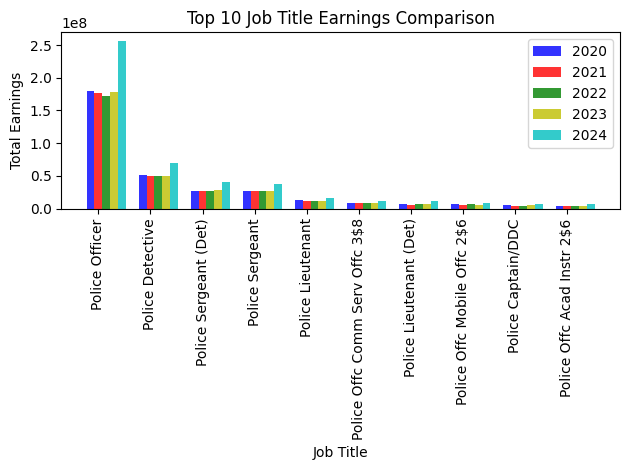

In [30]:
#把year2020,year2021,year2022,year2023,year2024画图，比较top10的收入
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, job2020, bar_width, alpha=opacity, color='b', label='2020')
rects2 = plt.bar(index + bar_width, job2021, bar_width, alpha=opacity, color='r', label='2021')
rects3 = plt.bar(index + bar_width*2, job2022, bar_width, alpha=opacity, color='g', label='2022')
rects4 = plt.bar(index + bar_width*3, job2023, bar_width, alpha=opacity, color='y', label='2023')
rects5 = plt.bar(index + bar_width*4, job2024, bar_width, alpha=opacity, color='c', label='2024')

plt.xlabel('Job Title')
plt.ylabel('Total Earnings')
plt.title('Top 10 Job Title Earnings Comparison')
plt.xticks(index + bar_width, job2020.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

    POSTAL  OVERTIME  TOTAL_GROSS  OVERTIME_RATIO
0    01119  54546.39    146909.03            0.37
1    01376      0.00     11683.74            0.00
2    01420  77108.85    237158.04            0.33
3    01453      0.00      3007.08            0.00
4    01460 111089.14    369402.15            0.30
..     ...       ...          ...             ...
217  34653      0.00      7581.07            0.00
218  34762      0.00     55584.46            0.00
219  34787      0.00     19633.83            0.00
220  78015      0.00      1058.19            0.00
221  89138      0.00     12329.08            0.00

[222 rows x 4 columns]


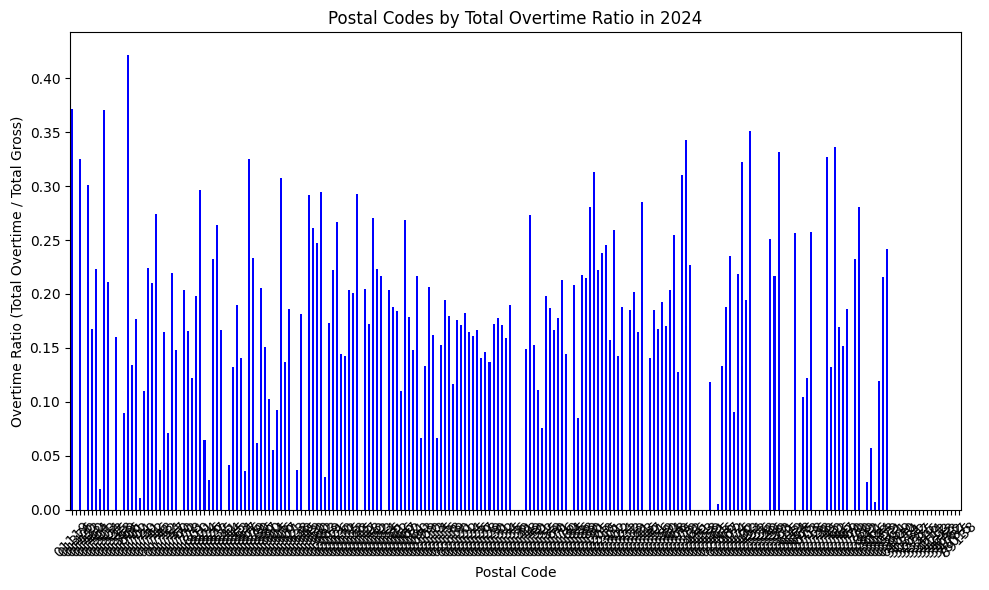

In [31]:
df2024 = df2024[df2024['DEPARTMENT_NAME'] == 'Boston Police Department']

# 清理数据并计算加班比例
df2024['OVERTIME'] = df2024['OVERTIME'].replace('[\$,]', '', regex=True).astype(float)
df2024['TOTAL_GROSS'] = df2024['TOTAL GROSS'].replace('[\$,]', '', regex=True).astype(float)

# 按邮政编码分组，计算加班总和和总收入总和
df2024_sum = df2024.groupby('POSTAL').agg({'OVERTIME': 'sum', 'TOTAL_GROSS': 'sum'}).reset_index()

# 计算加班总和占总收入总和的比例
df2024_sum['OVERTIME_RATIO'] = df2024_sum['OVERTIME'] / df2024_sum['TOTAL_GROSS']

# 打印结果
print(df2024_sum)

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))
df2024_sum.plot(kind='bar', x='POSTAL', y='OVERTIME_RATIO', ax=ax, legend=False, color='b')
plt.xlabel('Postal Code')
plt.ylabel('Overtime Ratio (Total Overtime / Total Gross)')
plt.title('Postal Codes by Total Overtime Ratio in 2024')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()